In [3]:
%matplotlib inline
import gdal
import numpy as np
from matplotlib.pyplot import imread
import numpy as np
from skimage import io
import scipy.stats
import os
import seaborn as sns
#img = io.imread('image.png', as_gray=True)
import matplotlib.pyplot as plt
import pandas as pd
input_path100_7="E:/Thesis/Data/roads_100_7_SYL/"
input_path50_7="E:/Thesis/Data/roads_50_7_SYL/"
input_path100_10="E:/Thesis/Data/roads_100_10_SYL/"
input_path50_10="E:/Thesis/Data/roads_50_10_SYL/"
table={}
table['spearmanrC']=list()
#table['pearsonrP']=list()
#table['kendalltauP']=list()
#table['spearmanrP']=list()
table['ran']=list()

In [4]:
t1={}
t1['range']=list()
for i in range(-100,101,1):
    t1['range'].append(i*0.01)
print(t1['range'])
#print(len(t1['freq']))
#print(len(t1['range']))

[-1.0, -0.99, -0.98, -0.97, -0.96, -0.9500000000000001, -0.9400000000000001, -0.93, -0.92, -0.91, -0.9, -0.89, -0.88, -0.87, -0.86, -0.85, -0.84, -0.8300000000000001, -0.8200000000000001, -0.81, -0.8, -0.79, -0.78, -0.77, -0.76, -0.75, -0.74, -0.73, -0.72, -0.71, -0.7000000000000001, -0.6900000000000001, -0.68, -0.67, -0.66, -0.65, -0.64, -0.63, -0.62, -0.61, -0.6, -0.59, -0.58, -0.5700000000000001, -0.56, -0.55, -0.54, -0.53, -0.52, -0.51, -0.5, -0.49, -0.48, -0.47000000000000003, -0.46, -0.45, -0.44, -0.43, -0.42, -0.41000000000000003, -0.4, -0.39, -0.38, -0.37, -0.36, -0.35000000000000003, -0.34, -0.33, -0.32, -0.31, -0.3, -0.29, -0.28, -0.27, -0.26, -0.25, -0.24, -0.23, -0.22, -0.21, -0.2, -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12, -0.11, -0.1, -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02, -0.01, 0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 

In [5]:
def TestAndAppend(Image_x,Image_y):
    SC,SP=scipy.stats.spearmanr(Image_x, Image_y, axis=None)
    table['spearmanrC'].append(SC)
    if(np.isnan(SC)):
        table['ran'].append(-2.0)
    else:
        for j in range (202):
            if(SC<t1['range'][j]):
                table['ran'].append((t1['range'][j]))
                break

In [6]:
def DF(table):
    df=pd.DataFrame.from_dict(table)
    print(df.shape)
    print(df.describe())
    print(df.head())
    return df
def HIST_null(df):
    df.ran.hist()
    df1=df.groupby('ran').size().reset_index(name='Size')
    return df1
def HIST(df):
    df=df.drop(df.index[0])
    df.ran.hist()
    return df


In [7]:
def TEST(x,y,z,input_path):
    for i in range(0,y,x):
         for j in range(0,z,x):
            Image_x  = io.imread(input_path+"tile_"+str(i)+"_"+str(j)+".tif",as_gray=True)
            Image_y = io.imread(input_path+"gtile_"+str(i)+"_"+str(j)+".tif",as_gray=True)
            TestAndAppend(Image_x,Image_y)

In [8]:
table['spearmanrC'].clear()
table['ran'].clear()
TEST(50,651,451,input_path50_7)

C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\ASUS\anaconda3\envs\TensorFlow-GPU\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\ASUS\anaconda3\envs\TensorFlow-GPU\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\ASUS\anaconda3\envs\TensorFlow-GPU\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


(140, 2)
       spearmanrC         ran
count   60.000000  140.000000
mean     0.416376   -0.962643
std      0.255787    1.213660
min     -0.196840   -2.000000
25%      0.275387   -2.000000
50%      0.430081   -2.000000
75%      0.583366    0.392500
max      0.933977    0.940000
   spearmanrC  ran
0         NaN -2.0
1         NaN -2.0
2         NaN -2.0
3         NaN -2.0
4         NaN -2.0


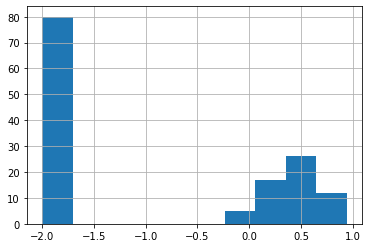

In [9]:
#df.pearsonrC.hist()
df=DF(table)
df51_7=HIST_null(df)


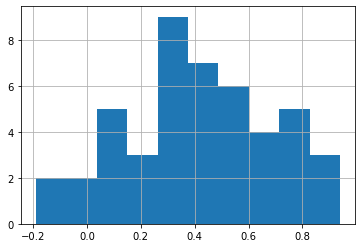

In [10]:
df52_7=HIST(df51_7)

In [11]:
table['spearmanrC'].clear()
table['ran'].clear()
TEST(50,651,451,input_path50_10)

(140, 2)
       spearmanrC         ran
count   91.000000  140.000000
mean     0.238968   -0.541714
std      0.139691    1.079786
min     -0.168855   -2.000000
25%      0.166262   -2.000000
50%      0.257367    0.150000
75%      0.318596    0.280000
max      0.706751    0.710000
   spearmanrC   ran
0         NaN -2.00
1    0.706751  0.71
2    0.088434  0.09
3    0.119426  0.12
4    0.233674  0.24


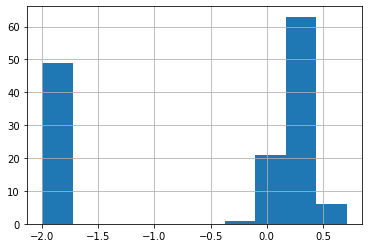

In [12]:
df50_10=DF(table)
df51_10=HIST_null(df50_10)


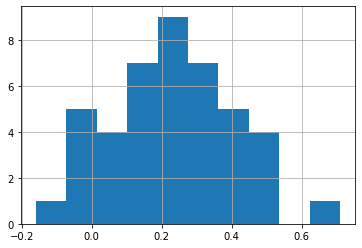

In [13]:
df52_10=HIST(df51_10)

In [14]:
table['spearmanrC'].clear()
table['ran'].clear()
TEST(100,601,401,input_path100_7)

(35, 2)
       spearmanrC        ran
count   25.000000  35.000000
mean     0.386247  -0.291429
std      0.210589   1.110610
min     -0.012025  -2.000000
25%      0.271247  -2.000000
50%      0.382486   0.290000
75%      0.482779   0.425000
max      0.817608   0.820000
   spearmanrC   ran
0    0.331528  0.34
1         NaN -2.00
2    0.156344  0.16
3    0.419724  0.42
4    0.382486  0.39


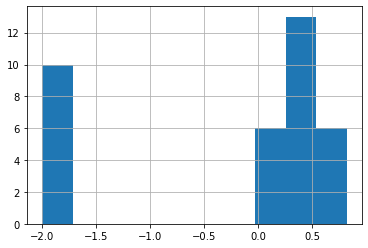

In [15]:
df100_7=DF(table)
df101_7=HIST_null(df100_7)


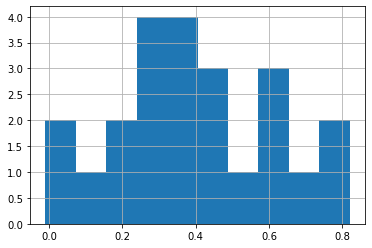

In [16]:
df102_7=HIST(df101_7)

In [17]:
table['spearmanrC'].clear()
table['ran'].clear()
TEST(100,601,401,input_path100_10)

(35, 2)
       spearmanrC        ran
count   28.000000  35.000000
mean     0.271220  -0.178571
std      0.122572   0.930427
min      0.011492  -2.000000
25%      0.208711   0.055000
50%      0.270811   0.220000
75%      0.337576   0.320000
max      0.521853   0.530000
   spearmanrC   ran
0    0.361157  0.37
1    0.081101  0.09
2    0.312879  0.32
3    0.337347  0.34
4    0.209178  0.21


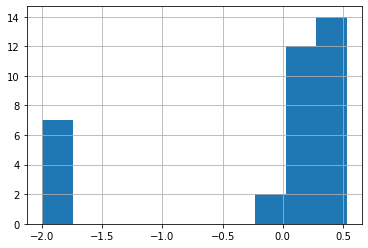

In [18]:
df100_10=DF(table)
df101_10=HIST_null(df100_10)

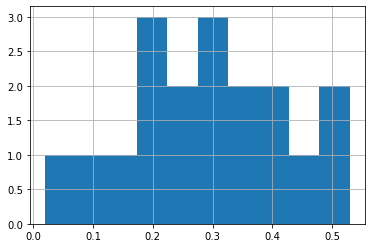

In [19]:
df102_10=HIST(df101_10)

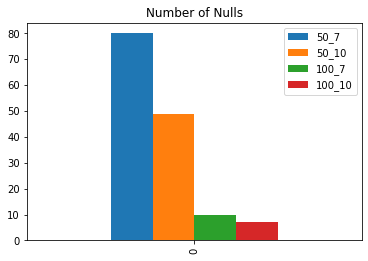

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
a=df51_7['Size'].iloc[0]
b=df51_10['Size'].iloc[0]
c=df101_7['Size'].iloc[0]
e=df101_10['Size'].iloc[0]
d =[ {
  "50_7": a,
  "50_10":b,
  "100_7":c,
    "100_10":e
}]
pd.DataFrame(d, index=[0]).plot(kind='bar')
plt.title("Number of Nulls")
plt.show()

Text(0.5, 1.0, 'KDE for different Zoom level & grid')

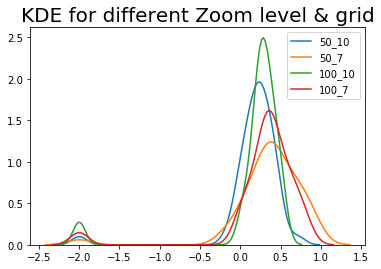

In [21]:
ay=sns.kdeplot(df51_10.ran,label="50_10")
ay=sns.kdeplot(df51_7.ran,label="50_7")
ay=sns.kdeplot(df101_10.ran,label="100_10")
ay=sns.kdeplot(df101_7.ran,label="100_7")
plt.title("KDE for different Zoom level & grid",fontsize = 20)


Text(0.5, 1, 'Range_Size_50_7')

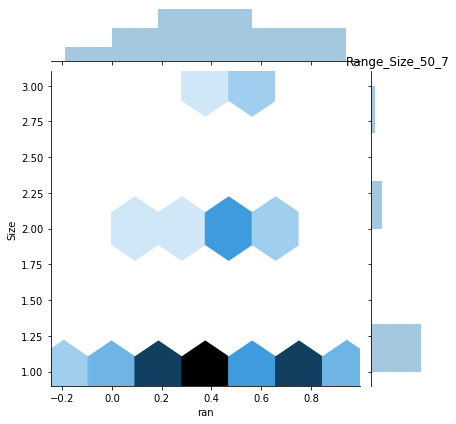

In [22]:
sns.jointplot(x='ran',y='Size',data=df52_7,kind='hex')
plt.title("Range_Size_50_7")

Text(0.5, 1, 'Range_Size_50_10')

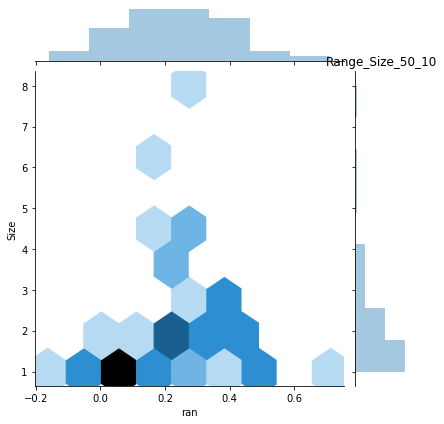

In [23]:
sns.jointplot(x='ran',y='Size',data=df52_10,kind='hex')
plt.title("Range_Size_50_10")

Text(0.5, 1, 'Range_Size_100_7')

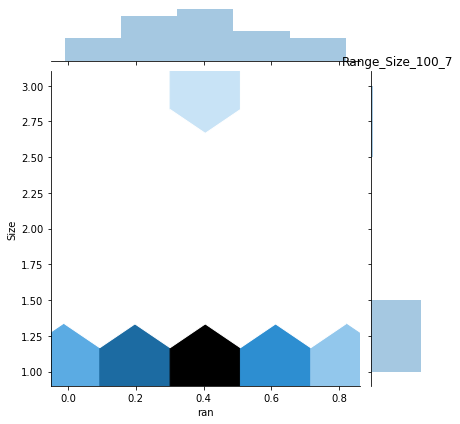

In [24]:
sns.jointplot(x='ran',y='Size',data=df102_7,kind='hex')
plt.title("Range_Size_100_7")

Text(0.5, 1, 'Range_Size_100_10')

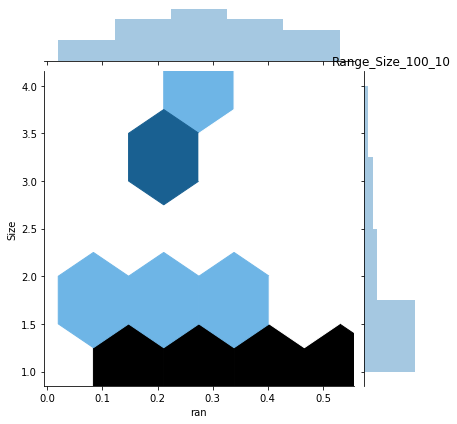

In [25]:
sns.jointplot(x='ran',y='Size',data=df102_10,kind='hex')
plt.title("Range_Size_100_10")

Text(0.5, 1.0, 'Range_Size_50_7')

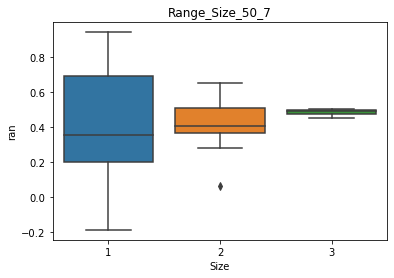

In [26]:
sns.boxplot('Size','ran',data=df52_7)
plt.title("Range_Size_50_7")

Text(0.5, 1.0, 'Range_Size_50_10')

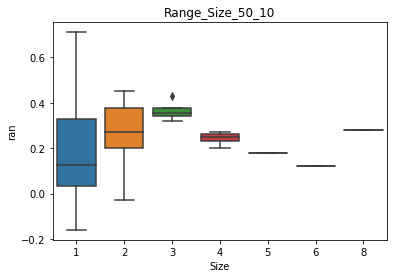

In [27]:
sns.boxplot('Size','ran',data=df52_10)
plt.title("Range_Size_50_10")

Text(0.5, 1.0, 'Range_Size_100_7')

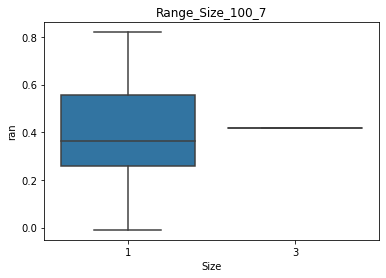

In [28]:
sns.boxplot('Size','ran',data=df102_7)
plt.title("Range_Size_100_7")

Text(0.5, 1.0, 'Range_Size_100_10')

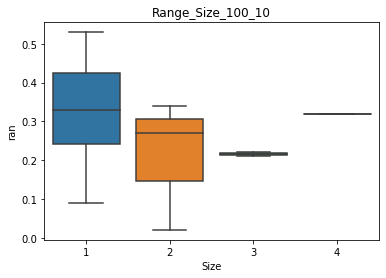

In [29]:
sns.boxplot('Size','ran',data=df102_10)
plt.title("Range_Size_100_10")


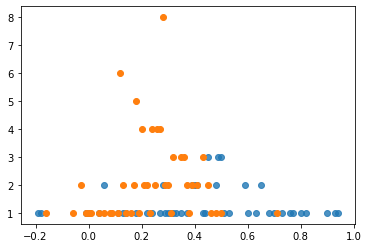

In [30]:
plt.scatter(y='Size', x='ran',data=df52_7,alpha=0.8)
plt.scatter(y='Size', x='ran',data=df52_10)
plt.show()